In [1]:
import os
import random

import keras
import numpy as np
import tensorflow as tf

from keras import backend as K
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Reproducible results...

# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)

Using TensorFlow backend.


(60000, 28, 28)


In [2]:
# Preprocess the data
x_train = np.array(x_train, dtype = 'float32')
x_test = np.array(x_test, dtype='float32')

x_train = x_train / 255.0
x_test= x_test / 255.0

In [3]:
# Split data into train and validation sets (80% and 20% respectively)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [4]:
# Define number of classes, image shape and batch size
num_classes = 10
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows, image_cols, 1)

In [5]:
# Reshape dataset
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

In [6]:
# Define some models

name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, kernel_initializer='he_normal', 
           name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

W1012 15:39:53.384567 140011726313280 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1012 15:39:53.388958 140011726313280 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1012 15:39:53.409588 140011726313280 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4255: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1012 15:39:53.413930 140011726313280 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1012 15:39:53.414945 140011726313280 deprecation_wrap

In [7]:
# Fit models
history_dict = {}
for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(lr=0.001),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

W1012 15:39:58.181985 140011726313280 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1012 15:39:58.285103 140011726313280 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 23s 469us/step - loss: 0.7715 - acc: 0.7381 - val_loss: 0.4742 - val_acc: 0.8384
Epoch 2/50
48000/48000 [==============================] - 21s 430us/step - loss: 0.4386 - acc: 0.8465 - val_loss: 0.3873 - val_acc: 0.8705
Epoch 3/50
48000/48000 [==============================] - 21s 442us/step - loss: 0.3889 - acc: 0.8633 - val_loss: 0.3607 - val_acc: 0.8768
Epoch 4/50
48000/48000 [==============================] - 21s 439us/step - loss: 0.3610 - acc: 0.8729 - val_loss: 0.3272 - val_acc: 0.8911
Epoch 5/50
48000/48000 [==============================] - 23s 488us/step - loss: 0.3378 - acc: 0.8823 - val_loss: 0.3148 - val_acc: 0.8925
Epoch 6/50
48000/48000 [==============================] - 23s 488us/step - loss: 0.3219 - acc: 0.8872 - val_loss: 0.3194 - val_acc: 0.8894
Epoch 7/50
48000/48000 [==============================] - 22s 467us/step - loss: 0.3106 - acc: 0.8914 - val_loss: 0.

Epoch 9/50
48000/48000 [==============================] - 41s 854us/step - loss: 0.2960 - acc: 0.8941 - val_loss: 0.2737 - val_acc: 0.9027
Epoch 10/50
48000/48000 [==============================] - 41s 853us/step - loss: 0.2802 - acc: 0.8988 - val_loss: 0.2528 - val_acc: 0.9113
Epoch 11/50
48000/48000 [==============================] - 41s 847us/step - loss: 0.2658 - acc: 0.9024 - val_loss: 0.2497 - val_acc: 0.9093
Epoch 12/50
48000/48000 [==============================] - 41s 857us/step - loss: 0.2587 - acc: 0.9056 - val_loss: 0.2504 - val_acc: 0.9099
Epoch 13/50
48000/48000 [==============================] - 41s 852us/step - loss: 0.2489 - acc: 0.9081 - val_loss: 0.2382 - val_acc: 0.9139
Epoch 14/50
48000/48000 [==============================] - 41s 852us/step - loss: 0.2387 - acc: 0.9121 - val_loss: 0.2331 - val_acc: 0.9162
Epoch 15/50
48000/48000 [==============================] - 41s 853us/step - loss: 0.2315 - acc: 0.9152 - val_loss: 0.2286 - val_acc: 0.9180
Epoch 16/50
48000/480

48000/48000 [==============================] - 83s 2ms/step - loss: 0.2276 - acc: 0.9128 - val_loss: 0.2399 - val_acc: 0.9174
Epoch 18/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2255 - acc: 0.9140 - val_loss: 0.2271 - val_acc: 0.9229
Epoch 19/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2193 - acc: 0.9145 - val_loss: 0.2341 - val_acc: 0.9224
Epoch 20/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2238 - acc: 0.9146 - val_loss: 0.2275 - val_acc: 0.9217
Epoch 21/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2159 - acc: 0.9182 - val_loss: 0.2331 - val_acc: 0.9214
Epoch 22/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2099 - acc: 0.9192 - val_loss: 0.2264 - val_acc: 0.9208
Epoch 23/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2104 - acc: 0.9185 - val_loss: 0.2199 - val_acc: 0.9214
Epoch 24/50
48000/48000 [=====================

In [8]:
# Get test loss and accuracy
for model in cnn_models:
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Model Name: {}'.format(model.name))
    print('Test Loss: {:.4f}'.format(score[0]))
    print('Test Accuracy: {:.4f}'.format(score[1]))

Model Name: 1_Layer
Test Loss: 0.2559
Test Accuracy: 0.9137
Model Name: 2_Layer
Test Loss: 0.2795
Test Accuracy: 0.9205
Model Name: 3_layer
Test Loss: 0.2927
Test Accuracy: 0.9197


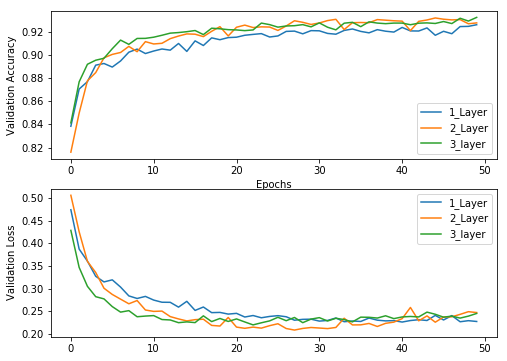

In [10]:
# Plot losses and accuracies by epoch
from matplotlib import pyplot as plt

fig,(ax1, ax2)=plt.subplots(2, figsize=(8, 6))
for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)

ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()

In [11]:
for model in cnn_models:
    print(model.summary())

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_____________________________________________________